## **In this notebook, we visualize the data with different normalization techniques.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

>### **Load the data**

In [4]:
unnormed_train_path = './jet_data_unnormed_80train.pkl'
unnormed_test_path = './jet_data_unnormed_20test.pkl'

unnormed_train = pd.read_pickle(unnormed_train_path)
unnormed_test = pd.read_pickle(unnormed_test_path)

In [5]:
print('Training sample:')
print(unnormed_train.head())

print('\n')

print('Testing sample:')
print(unnormed_test.head())

print('\n')

print('The number of entries in the training data:', len(unnormed_train))
print('The number of entries in the validation data:', len(unnormed_test))

Training sample:
              E        pt       eta       phi
11092   73356.1   68288.8 -0.364836 -2.683820
6607   155625.0  114949.0  0.809188  3.009770
9670    36304.3   27072.0  0.792701  0.196966
13354  329132.0  280958.0 -0.575831  2.154610
16500  855691.0  647140.0  0.781380 -3.058920


Testing sample:
           E        pt       eta       phi
14  640313.0  589524.0  0.390749  1.237340
15  332790.0  126272.0  1.619980 -1.855240
18   47443.5   46891.6 -0.001507  2.455980
20   37600.4   31288.8  0.624681 -0.910782
27  127675.0   28650.7 -2.172010  2.553590


The number of entries in the training data: 18129
The number of entries in the validation data: 4532


In [6]:
# Standard Normalization

def get_normalize_data():
    
    train = pd.read_pickle(unnormed_train_path)
    test = pd.read_pickle(unnormed_test_path)
   
    train_mean = train.mean()
    train_std = train.std()

    train = (train - train_mean) / train_std
    test = (test - train_mean) / train_std

    return train.astype('float32'), test.astype('float32')

In [7]:
# Custom Normalization

def get_custom_normalize_data():
    
    train = pd.read_pickle(unnormed_train_path)
    test = pd.read_pickle(unnormed_test_path)
    train['pt'] = train['pt'].apply(lambda x: np.log10(x) / 3.)
    train['E'] = train['E'].apply(lambda x: np.log10(x)  / 3.)
    train['eta'] = train['eta'] / 3.
    train['phi'] = train['phi'] / 3.
    
    test['pt'] = test['pt'].apply(lambda x: np.log10(x) / 3.)
    test['E'] = test['E'].apply(lambda x: np.log10(x) / 3.)
    test['eta'] = test['eta'] / 3.
    test['phi'] = test['phi'] / 3.

    return train.astype('float32'), test.astype('float32')

In [17]:
# Plotting data

def plot_data(data, filename, save=False):
    
    variable_list = [r'$E$', r'$p_T$', r'$\eta$', r'$\phi$']
    branches=["E","pt","eta","phi"]
    n_bins = 100

    for kk in range(0,4):
        plt.subplot(2, 2, kk+1)
        plt.hist(data[branches[kk]], bins=n_bins)
        plt.xlabel(variable_list[kk])
        plt.ylabel('Number of jets')
    
        if save:
            plt.savefig('./Plots/Data_Viz/' + filename, dpi=300)

>### **Plot data (No Normalization)**

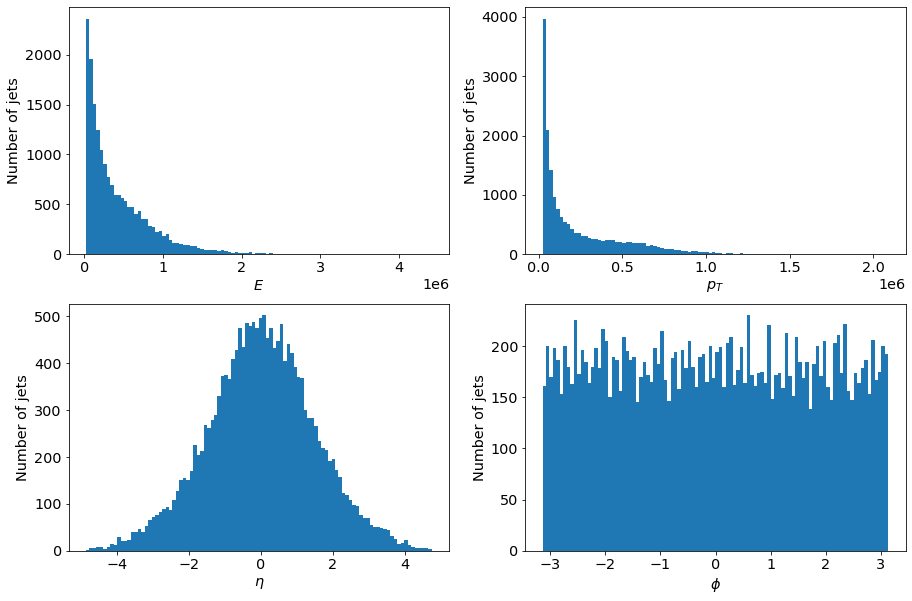

In [20]:
 plot_data(unnormed_train, filename = 'fourmomentum_no_normalization', save=True)

>### **Plot data (Standard Normalization)**

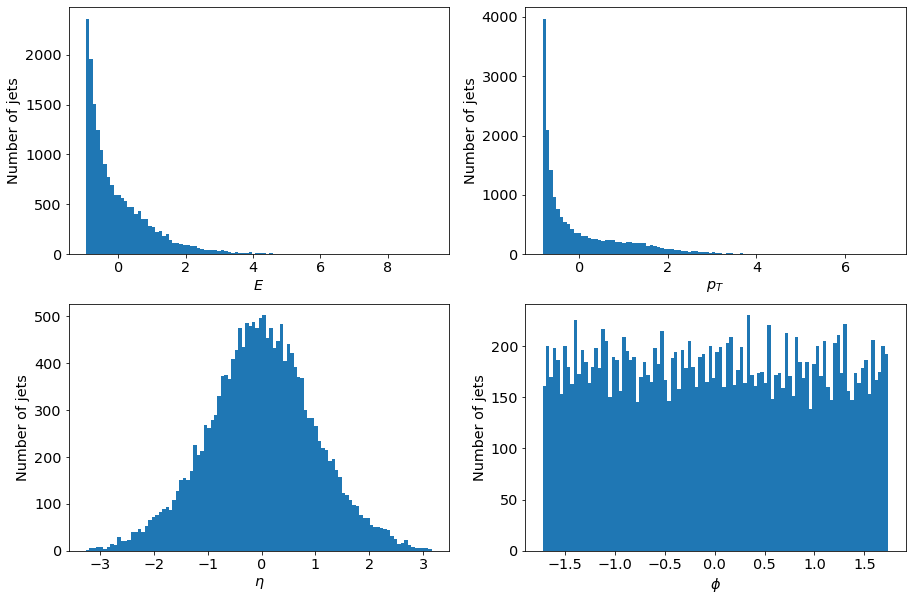

In [21]:
norm_train, norm_test = get_normalize_data()
plot_data(norm_train, filename = 'fourmomentum_standard_normalization', save=True)

>### **Plot data (Custom Normalization)**

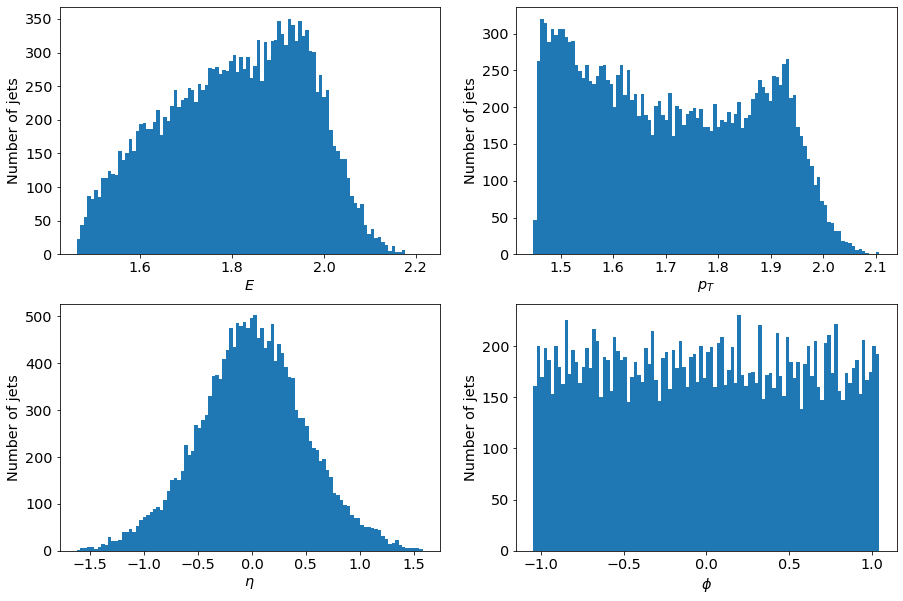

In [22]:
cust_norm_train, cust_norm_test = get_custom_normalize_data()
plot_data(cust_norm_train, filename = 'fourmomentum_custom_normalization', save=True)